## Case understanding and objective

### Importing data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#pd.set_option('display.max_colwidth', 2000)
# pd.set_option('display.colheader_justify', 'center')

pd.options.display.max_columns = None #to display all columns
pd.options.display.max_rows = None #to display all rows

LCdata = pd.read_csv(r"C://Users//Shubhada//Desktop//Upgrad//PGP_AIML//Course 2- Statistics Essentials//Lending club case study//loan.csv")

C:\Users\Shubhada\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3156: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
LCdata.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
LCdata.shape

(39717, 111)

In [4]:
LCdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### missing data treatment

In [5]:
#lets count number of null values in each column
LCdata.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [6]:
#remove columns with all null values
loandata = LCdata.dropna(axis=1, how='all')

loandata.shape
#observation: from 111 columns we came to 57 columns now

(39717, 57)

In [7]:
#remove rows with all null values
loandata = loandata.dropna(axis=0, how='all')

loandata.shape
#observation: there are no rows with all null values

(39717, 57)

In [8]:
#lets check what all columns we have now after removing cols ans rows with all null values
loandata.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [9]:
#lets check columnwise null value count again and remove columns where count of nulls is more 
loandata.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [10]:
droplist1 = ["desc", "mths_since_last_delinq", "mths_since_last_record", "next_pymnt_d"]
loandata.drop(labels = droplist1, axis=1, inplace = True)

In [11]:
loandata.shape

(39717, 53)

In [12]:
loandata.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### handling columns with all same values

In [13]:
unique_col_values = loandata.nunique()
print(unique_col_values)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [14]:
#lets drop all columns with single unique values since they won't help us in our further analysis
drop2 = unique_col_values[unique_col_values.values == 1]
drop2.index

droplist2= ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
            'policy_code', 'application_type', 'acc_now_delinq',
            'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'installment']
loandata.drop(labels = droplist2, axis=1, inplace = True)

In [15]:
loandata.shape

(39717, 43)

In [16]:
loandata.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [17]:
loandata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [18]:
#lets remove columns in which values are diierent for each customer
#zipcode coll values are incomplete
droplist3 = ["id", "member_id", "url", "zip_code"]
loandata.drop(labels = droplist3, axis=1, inplace = True)
loandata.shape

(39717, 39)

In [19]:
#there are certain fields which are created once the loan is approved, keeping those will not help us since our objective is to decide the previous step
#So,lets remove those fields
droplist4 = ["out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
             "total_rec_prncp","total_rec_int","total_rec_late_fee",
             "recoveries","collection_recovery_fee", "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
loandata.drop(labels = droplist4, axis=1, inplace = True)
loandata.shape

(39717, 27)

### Handling data type, standardizing values and text

In [20]:
#lets check type of columns & change it wherever required
loandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_title             37258 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  title              

In [21]:
# converting amount related fields to numeric i.e. 'int_rate','emp_length'
#we will get an error at below line since int_rate field contains "%" sign in it
#lets remove the sign and convert it to numeric
loandata['int_rate'] = loandata['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [22]:
LESS THAN 1 YR CHANGE

SyntaxError: invalid syntax (<ipython-input-22-8c1e9721cd60>, line 1)

In [23]:
#lets check unique values in emp_length field
loandata['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [24]:
#extracting only number from emp_length field
loandata.emp_length.fillna('0',inplace=True) #imputing zeros wherever values are null
loandata['emp_length']=loandata.emp_length.str.extract('(\d+)')
loandata['emp_length']=loandata.emp_length.astype(int)

In [25]:
loandata.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,B,B2,NaN,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0
1,2500,2500,2500.0,60 months,15.27,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0


In [26]:
# loan_status == 'Current' will not help us analysing if the loan is to be approved or rejected
#so removing these values makes sense
loandata = loandata[~(loandata['loan_status'] == 'Current')]
loandata.shape

(38577, 27)

In [27]:
loandata['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [28]:
#loandata.describe()

### Derive new columns

In [29]:
# seperate issue_d into issue_m and issue_y columns

loandata.issue_d = pd.to_datetime(loandata.issue_d, format='%b-%y')
loandata['issue_year']=loandata['issue_d'].dt.year
loandata['issue_month']=loandata['issue_d'].dt.month

loandata.head(1)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_year,issue_month
0,5000,5000,4975.0,36 months,10.65,B,B2,NaN,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0,2011,12


## Univariate Analysis

#### var-1____ Loan_amnt

In [30]:
loandata['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

C:\Users\Shubhada\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='loan_amnt'>

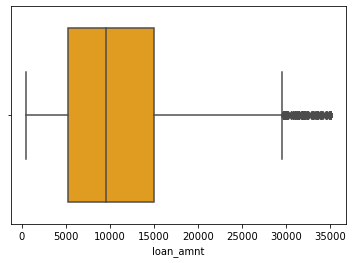

In [31]:
sns.boxplot(loandata.loan_amnt, color='orange')

In [32]:
loandata['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [33]:
print("90th percentile of loan_amnt: ", np.percentile(loandata['loan_amnt'],90, axis= 0))

90th percentile of loan_amnt:  21600.0


C:\Users\Shubhada\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='annual_inc'>

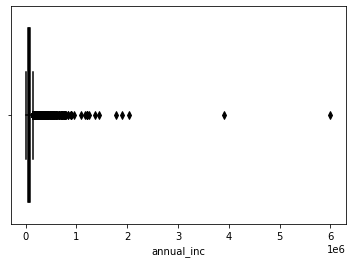

In [34]:
sns.boxplot(loandata.annual_inc, color='black')
#loandata['annual_inc'].plot.box()

#### var-2____ annual_inc

In [35]:
#lets check percentile distyribution for other features like total_pymnt
loandata['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [36]:
loandata.shape

(38577, 29)

In [37]:
print("99th percentile of loan_amnt: ", np.percentile(loandata['annual_inc'],99, axis= 0))

99th percentile of loan_amnt:  234143.99999999878


In [38]:
#loandata = loandata[loandata["annual_inc"] < loandata["annual_inc"].quantile(0.99)]
loandata = loandata[loandata["annual_inc"] < np.percentile(loandata['annual_inc'],99, axis= 0)]

In [39]:
loandata['annual_inc'].describe()

count     38191.000000
mean      65313.610090
std       35150.773045
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80232.000000
max      234000.000000
Name: annual_inc, dtype: float64

In [40]:
loandata.shape

(38191, 29)

In [41]:
#int_rate

loandata['int_rate'].describe()

#From output, median intrest rate is 11.71%, after 75% percentile interest rate increased froom 14.35% to 24.4%.

count    38191.000000
mean        11.917876
std          3.684108
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

## Bivariate analysis : Correlation matrix for quantitative variables

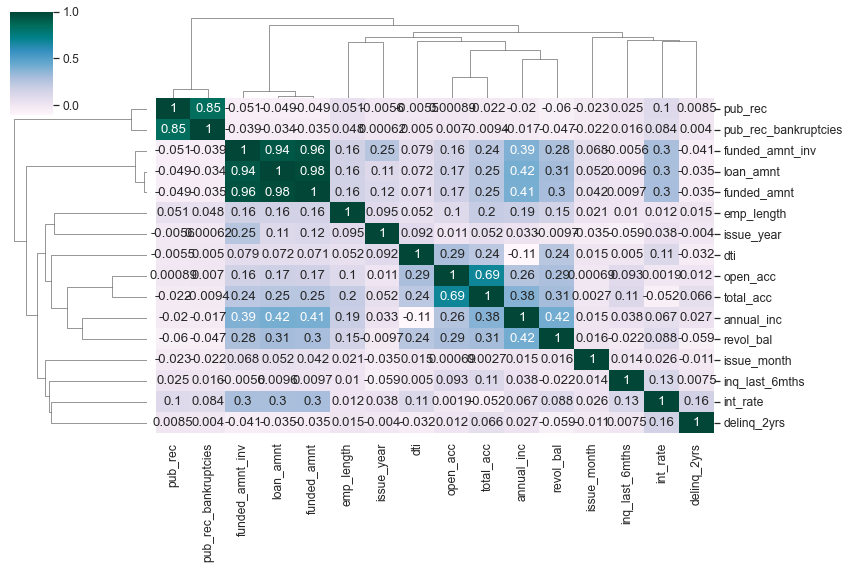

In [42]:
# To show closeness among numerical variables, lets plot Heatmap with Dendogram i.e. clustermap
corrplot = loandata.corr()
sns.set(font_scale=1.1)
sns.clustermap(corrplot,annot=True,figsize=(12, 8),cmap="PuBuGn")
plt.show()

#from corrplot, we can see, loan_amnt, funded_amnt_inv, funded_amnt are strongly correlated
#annual income and dti are negatively correlated
#emp_length and annual_inc are positively correlated

In [43]:
loandata.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_year,issue_month
0,5000,5000,4975.0,36 months,10.65,B,B2,NaN,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0,2011,12
1,2500,2500,2500.0,60 months,15.27,C,C4,Ryder,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0,2011,12
2,2400,2400,2400.0,36 months,15.96,C,C5,NaN,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0,2011,12
3,10000,10000,10000.0,36 months,13.49,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0,2011,12
5,5000,5000,5000.0,36 months,7.90,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.0,2011,12


In [44]:
#lets do analysis of loan status versus annual income and loan amount
#lets create a new columns which indicates buckets of annual income and loan amount for further analysis
#We have already removed outliers from annual income & loan amount in earlier steps

In [45]:
#lets check unique categorical values in loan data
loandata['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [46]:
#lets check minimum and maximun values in annual income and loan amount columns
print('min annual inc:', loandata['annual_inc'].min(), 'max annual inc:',loandata['annual_inc'].max())
print('min loan amnt:', loandata['loan_amnt'].min(), 'max loan amnt:', loandata['loan_amnt'].max())

min annual inc: 4000.0 max annual inc: 234000.0
min loan amnt: 500 max loan amnt: 35000


In [47]:
#lets check minimum and maximun values of int_rate and dti for further analysis
print('min int_rate:', loandata['int_rate'].min(), 'max int_rate:',loandata['int_rate'].max())
print('min dti:', loandata['dti'].min(), 'max int_rate:', loandata['dti'].max())

min int_rate: 5.42 max int_rate: 24.4
min dti: 0.0 max int_rate: 29.99


In [48]:
# lets create buckets for all of the four variables above for further analysis
loandata['annual_income_categories'] = pd.cut(loandata['annual_inc'], [0, 25000, 50000, 75000, 100000,1000000], labels=['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+'])
loandata['loan_amount_categories'] = pd.cut(loandata['loan_amnt'], [0, 8000, 16000, 24000, 32000, 40000], labels=['0-8000', '8000-16000', '16000-24000', '24000-32000', '32000+'])
loandata['int_rate_categories'] = pd.cut(loandata['int_rate'], [0, 10, 13, 16, 20, 50], labels=['0-10', '10-13', '13-16', '16-20', '20+'])
loandata['dti_categories'] = pd.cut(loandata['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [49]:
loandata.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_year,issue_month,annual_income_categories,loan_amount_categories,int_rate_categories,dti_categories
0,5000,5000,4975.0,36 months,10.65,B,B2,NaN,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0,2011,12,0-25000,0-8000,10-13,NaN
1,2500,2500,2500.0,60 months,15.27,C,C4,Ryder,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0,2011,12,25000-50000,0-8000,13-16,0-5


In [50]:
# Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan_status = loandata.groupby(['annual_income_categories', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan_status['Total'] = inc_range_vs_loan_status['Charged Off']+ inc_range_vs_loan_status['Fully Paid'] 
inc_range_vs_loan_status['Chargedoff_Proportion'] = inc_range_vs_loan_status['Charged Off'] / inc_range_vs_loan_status['Total']
inc_range_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

#Observations:
#lower range of annual income has high charge off, with increase in annual income charged off proportion decreases

loan_status,annual_income_categories,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-25000,488,2062,2550,0.191373
1,25000-50000,2125,10714,12839,0.165511
2,50000-75000,1686,9982,11668,0.144498
3,75000-100000,736,5303,6039,0.121874
4,100000+,549,4546,5095,0.107753


In [52]:
# Bivariate Analysis on interest rate against Chargedoff_Proportion -

int_rate_vs_loan_status = loandata.groupby(['int_rate_categories', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
int_rate_vs_loan_status['Total'] = int_rate_vs_loan_status['Charged Off']+ int_rate_vs_loan_status['Fully Paid'] 
int_rate_vs_loan_status['Chargedoff_Proportion'] = int_rate_vs_loan_status['Charged Off'] / int_rate_vs_loan_status['Total']
int_rate_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

#Observations:
#default rate is higher for higher interest rates
#Interest rates lower than 10% have less chances of default
#interest rates higher than 16% have higher chances of default

loan_status,int_rate_categories,Charged Off,Fully Paid,Total,Chargedoff_Proportion
4,20+,290,452,742,0.390836
3,16-20,1250,3317,4567,0.273703
2,13-16,1639,7431,9070,0.180706
1,10-13,1580,10005,11585,0.136383
0,0-10,825,11402,12227,0.067474


In [53]:
#loandata['int_rate_categories'].unique()

In [54]:
#loandata['annual_income_categories'].unique()

In [55]:
# Bivariate Analysis on employment length against Chargedoff_Proportion -

emp_len_vs_loan_status = loandata.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emp_len_vs_loan_status['Total'] = emp_len_vs_loan_status['Charged Off']+ emp_len_vs_loan_status['Fully Paid'] 
emp_len_vs_loan_status['Chargedoff_Proportion'] = emp_len_vs_loan_status['Charged Off'] / emp_len_vs_loan_status['Total']
emp_len_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

#Observations:
#default rate is higher for higher interest rates
#Interest rates lower than 10% have less chances of default
#interest rates higher than 16% have higher chances of default

loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0,227,801,1028,0.220817
10,10,1316,7038,8354,0.157529
7,7,262,1435,1697,0.154390
5,5,456,2712,3168,0.143939
8,8,203,1216,1419,0.143058
1,1,1090,6532,7622,0.143007
6,6,305,1846,2151,0.141795
3,3,551,3426,3977,0.138547
4,4,456,2859,3315,0.137557
2,2,561,3684,4245,0.132155


In [56]:
# Bivariate Analysis on dti_categories against Chargedoff_Proportion -

dti_cat_vs_loan_status = loandata.groupby(['dti_categories', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_cat_vs_loan_status['Total'] = dti_cat_vs_loan_status['Charged Off']+ dti_cat_vs_loan_status['Fully Paid'] 
dti_cat_vs_loan_status['Chargedoff_Proportion'] = dti_cat_vs_loan_status['Charged Off'] / dti_cat_vs_loan_status['Total']
dti_cat_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

#Observations:
#default rate is higher for higher interest rates
#Interest rates lower than 10% have less chances of default
#interest rates higher than 16% have higher chances of default

loan_status,dti_categories,Charged Off,Fully Paid,Total,Chargedoff_Proportion
4,25+,1116,5455,6571,0.169837
3,15-20,1385,7399,8784,0.157673
2,10-15,1392,8164,9556,0.145668
1,05-10,996,6749,7745,0.128599
0,0-5,580,4157,4737,0.122440


In [57]:
corrp = loandata.corr()


In [58]:
# piv = pd.pivot_table(loandata, values = "freq", index = ["dti_categories"], columns = ["annual_inc"], fill_value = 0)
# ax = sns.heatmap(piv, square = TRUE)
# plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
# plt.tight_layout()
# plt.show()

In [ ]:
# Bivariate_Categorical(x='dti_p', y='annual_inc_p', figsize=(10,4))

In [ ]:
# sns.regplot(x=loandata["dti_categories"], y=loandata['annual_inc'])